<a href="https://colab.research.google.com/github/AditAhmedabadi/Cats_vs_Dogs_DNN_Classifier/blob/master/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Modules

In [65]:
import zipfile
import os
from random import randint
import numpy as np
import pandas as pd
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.3.0


## Downloading Cats and Dogs Dataset

In [66]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-24 02:25:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   289MB/s    in 0.2s    

2020-09-24 02:25:24 (289 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Extracting Dataset.zip and arranging it

In [67]:
zip_handle = zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip' , 'r')
zip_handle.extractall('/tmp')
zip_handle.close()

In [68]:
base_dir = "/tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir , 'train')
val_dir = os.path.join(base_dir , 'validation')

cats_train_dir = os.path.join(train_dir , 'cats')
dogs_train_dir = os.path.join(train_dir , 'dogs')

cats_val_dir = os.path.join(val_dir , 'cats')
dogs_val_dir = os.path.join(val_dir , 'dogs')

### Size of Dataset

In [69]:
cats_train_files = os.listdir(cats_train_dir)
dogs_train_files = os.listdir(dogs_train_dir)

cats_val_files = os.listdir(cats_val_dir)
dogs_val_files = os.listdir(dogs_val_dir)

print("Train Images for Cats: {} \nTrain Images for Dogs: {} \nValidation Images for Cats: {} \nValidation Images for Dogs: {}".format(len(cats_train_files),len(dogs_train_files) , len(cats_val_files) , len(dogs_val_files)))

Train Images for Cats: 1000 
Train Images for Dogs: 1000 
Validation Images for Cats: 500 
Validation Images for Dogs: 500


In [70]:
i = randint(0,250)
print(cats_train_files[i:i+7])
print(dogs_train_files[i:i+7])

next_cat_img = [os.path.join(cats_train_dir , img_name) for img_name in cats_train_files[i:i+8]]
next_dog_img = [os.path.join(dogs_train_dir , img_name) for img_name in dogs_train_files[i:i+8]]

['cat.252.jpg', 'cat.665.jpg', 'cat.635.jpg', 'cat.307.jpg', 'cat.687.jpg', 'cat.303.jpg', 'cat.569.jpg']
['dog.831.jpg', 'dog.385.jpg', 'dog.8.jpg', 'dog.529.jpg', 'dog.597.jpg', 'dog.813.jpg', 'dog.591.jpg']


### Printing random images from dataset to get an idea of how the dataset is

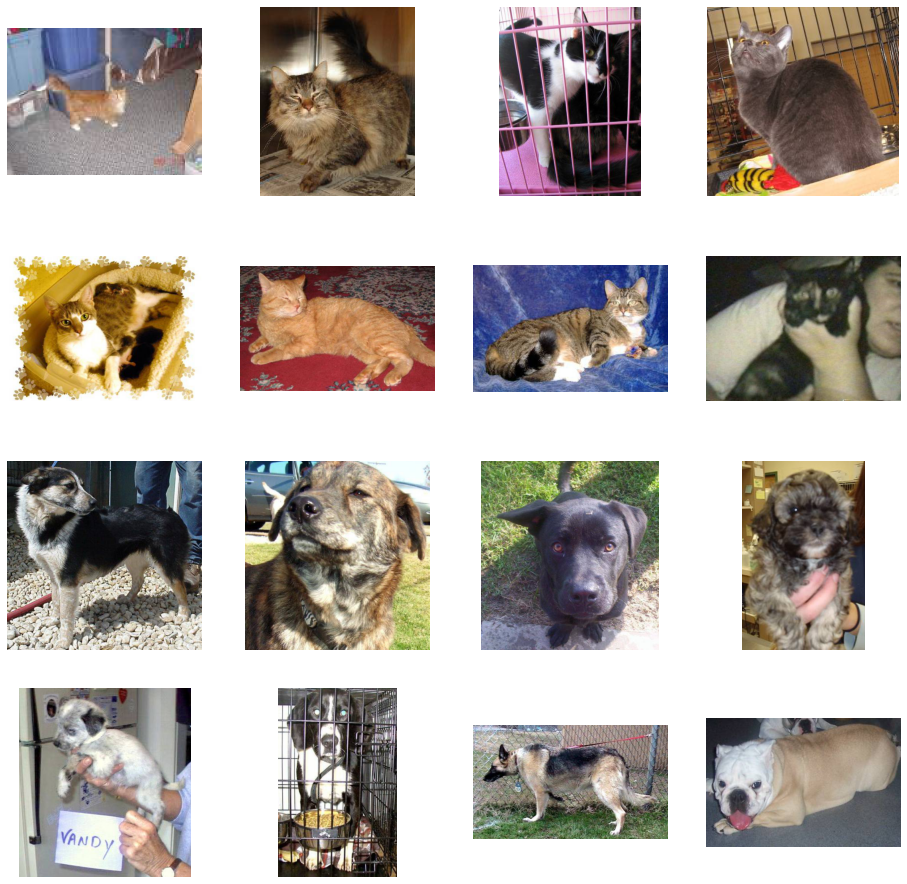

In [71]:


nrows = ncols = 4

fig,ax = plt.subplots(nrows = 4 , ncols = 4)
fig.set_size_inches(16,16)
# for counter , axis in zip(range(0,8) , ax):
img_path = dict(enumerate(next_cat_img + next_dog_img))

count = 0
for m in ax:
  for axis in m:
    image = mpimg.imread(img_path[count])
    axis.imshow(image)
    axis.axis('off')
    count +=1


# Creating the Model
This model is a ConvNet Neural Network made up of 3 Convolutional Layers of 16,32 and 64 filters of (3,3) dimension and each convolution is followed by Max Pooling of (2,2) dimension. Then there is a flatten layer and a dense hidden layer of 512 neurons and lastly the output dense layer made up of 1 neuron for binary classification using sigmoid activation function

In [72]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3) , input_shape = (150,150,3) , activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512 , activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## Brief Description of the process which every image will go through in the Neural Network

In [73]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)            

Using RMSprop optmizer with a learning_rate of 0.001 and binary_crossentropy loss function

In [74]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) , loss = 'binary_crossentropy' , metrics = ['accuracy']  )

#Preprocessing Images

By using the ImageDataGenerator in keras.preprocssing.image in keras API.
Here I have used Image Augmentation for better accuracy , the parameters are specified below. Creating a training generator of 150x150 images with batch size of 20

Using Image Augmentation solves the problem of overfitting your data

In [75]:
train_datagen = ImageDataGenerator(
    rescale = 1/225.0,
    horizontal_flip='True',
    zoom_range = 0.4,
    shear_range = 0.4,
    rotation_range = 70,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
)

val_datagen = ImageDataGenerator(
    rescale = 1/225.0,
    horizontal_flip='True',
    zoom_range = 0.4,
    shear_range = 0.4,
    rotation_range = 70,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fitting Data into the Neural Network
Fitting data with 15 epochs

In [76]:
model_fit = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                    )

Epoch 1/15
100/100 [==============================] - 20s 200ms/step - loss: 0.8261 - accuracy: 0.5260 - val_loss: 0.6899 - val_accuracy: 0.5630
Epoch 2/15
100/100 [==============================] - 20s 198ms/step - loss: 0.6741 - accuracy: 0.5855 - val_loss: 0.6506 - val_accuracy: 0.6070
Epoch 3/15
100/100 [==============================] - 20s 197ms/step - loss: 0.6647 - accuracy: 0.6175 - val_loss: 0.6383 - val_accuracy: 0.6140
Epoch 4/15
100/100 [==============================] - 20s 197ms/step - loss: 0.6401 - accuracy: 0.6355 - val_loss: 0.6410 - val_accuracy: 0.6270
Epoch 5/15
100/100 [==============================] - 20s 197ms/step - loss: 0.6345 - accuracy: 0.6320 - val_loss: 0.6321 - val_accuracy: 0.6460
Epoch 6/15
100/100 [==============================] - 20s 199ms/step - loss: 0.6670 - accuracy: 0.6505 - val_loss: 0.6133 - val_accuracy: 0.6600
Epoch 7/15
100/100 [==============================] - 20s 197ms/step - loss: 0.6193 - accuracy: 0.6745 - val_loss: 0.6055 - val_ac

# Testing Dataset with random cat and dog images picked out from the Internet

Model Predicts each and every photo correctly


Saving cat_test_1.jpg to cat_test_1 (7).jpg
Saving cat_test_2.jpg to cat_test_2 (6).jpg
Saving dog_test_1.webp to dog_test_1 (6).webp
Saving dog_test_2.jpg to dog_test_2 (6).jpg


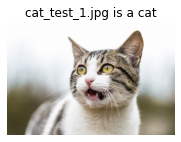

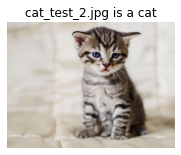

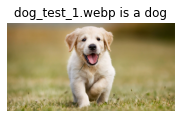

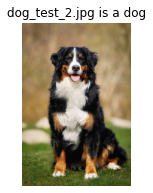

In [78]:
from keras.preprocessing.image import load_img , img_to_array
upload_img = files.upload()

for file_name in upload_img.keys():
  dir = '/content/' + file_name

  inp = load_img(dir,target_size=(150,150))
  inp = img_to_array(inp)

  arr_image = np.expand_dims(inp , axis = 0)
  arr_image = np.vstack([arr_image])

  result = model.predict(arr_image)

  plt.figure(figsize = (3,3))
  axis = plt.gca()
  axis.axis('off')
  if result[0] ==1: 
    plt.title('{} is a dog'.format(file_name))
  else:
    plt.title(('{} is a cat'.format(file_name)))
  img_predict = mpimg.imread(dir)
  plt.imshow(img_predict)



## Plotting the Accuracy - Validation Accuracy Curve and Loss - Validation Loss Curve of the Model Neural Network

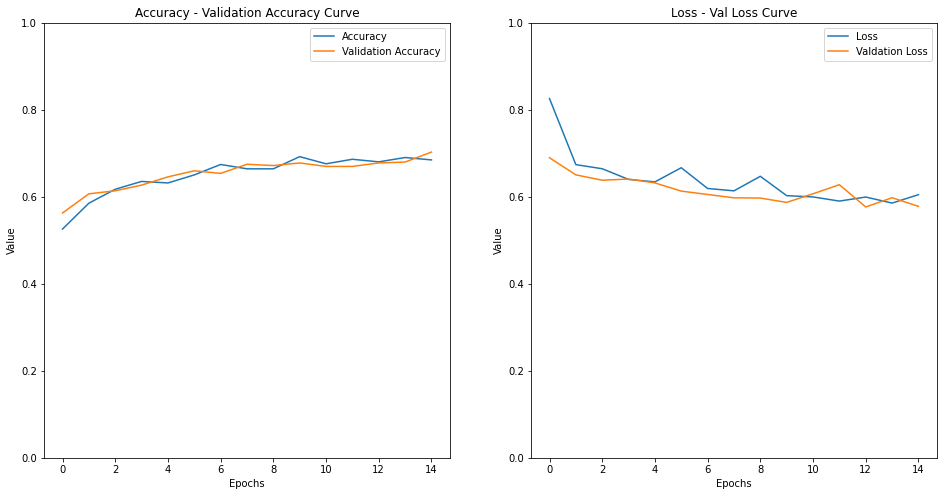

In [79]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

epochs = range(len(acc))
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
ax[0].plot(epochs , acc , epochs , val_acc)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Value")
ax[0].title.set_text("Accuracy - Validation Accuracy Curve")
ax[0].legend(['Accuracy' , 'Validation Accuracy'] , loc = 'upper right')

ax[1].plot(epochs , loss,  epochs , val_loss ,label = 'Validation Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Value")
ax[1].set_ylim(0,1)
ax[1].title.set_text("Loss - Val Loss Curve")
ax[1].legend(['Loss' , 'Valdation Loss'] , loc = 'upper right')
plt.show()

As you can see image augmentation helped in steady growth of both accuracy and validation accuracy and helped the model avoid overfitting
